# Setup environment

In [17]:
%pylab
%matplotlib inline

# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# In /usr/local/anaconda3/lib/python3.9/site-packages

sns.set()

# Show plots in external matplotlib app (required for VSCode)
plt.show()

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
iris = sns.load_dataset("iris")
iris.head(), iris.columns, type(iris)

(   sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa,
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object'),
 pandas.core.frame.DataFrame)

<AxesSubplot:>

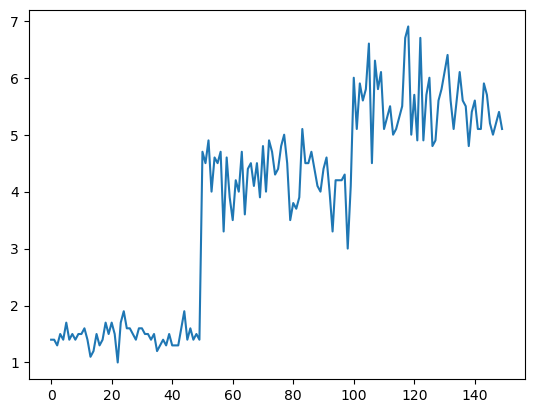

In [5]:
iris['petal_length'].plot()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


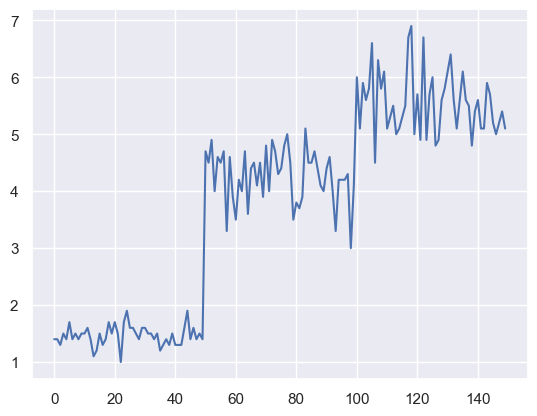

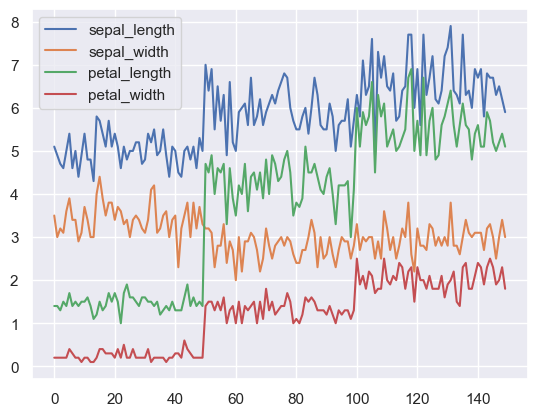

In [16]:
# If required rename the columns 
iris.columns = ['sepal_length','sepal_width','petal_length','petal_width', 'species']
# Plots only 1 (renamed) column
iris['petal_length'].plot()
# Plots all columns
iris.plot()
iris

In [18]:
# Download a new dataset (CSV file) using an internally hardcoded URL 
# CSV files can be found here: https://github.com/mwaskom/seaborn-data
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
# day = day of the week
# size = number of people
day_size_crosstabulation = pd.crosstab(tips["day"],tips["size"])
day_size_crosstabulation

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


<AxesSubplot:xlabel='day'>

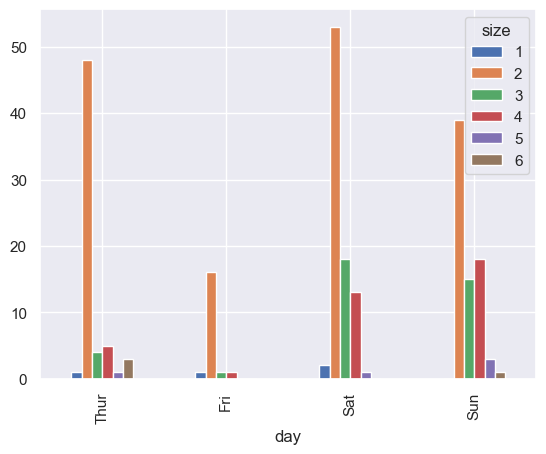

In [22]:
day_size_crosstabulation.plot.bar()

# Bar plots

<AxesSubplot:xlabel='day', ylabel='tips_percentage'>

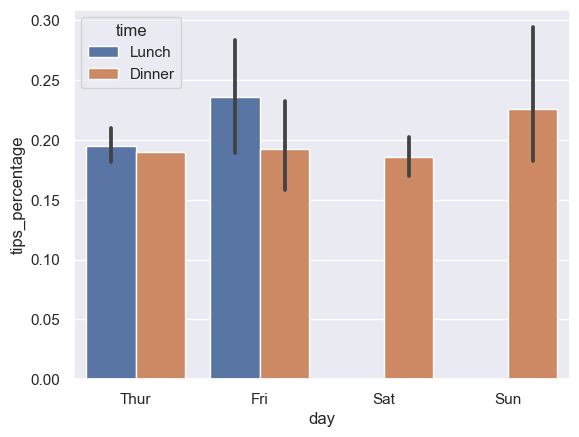

In [23]:
tips['tips_percentage'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Normal 2-dimension chart
# sns.barplot(x='day', y='tips_percentage', data=tips, orient='v')

# 3-dimension chart! 3rd dimension is column 'time'
sns.barplot(x='day', y='tips_percentage', data=tips, orient='v', hue='time')

# Plot with confidence interval ?

# Histograms and Density plots

Great to see distributions

<AxesSubplot:ylabel='Frequency'>

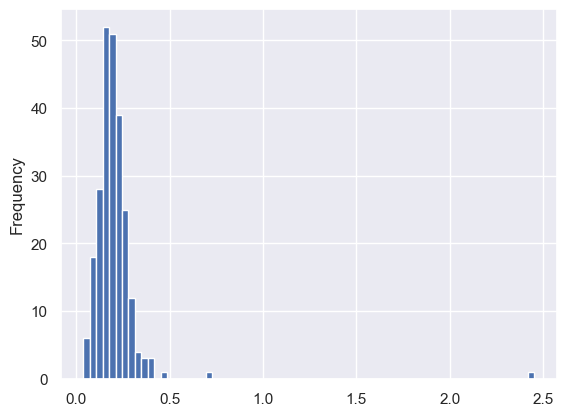

In [24]:
# Historgram
tips['tips_percentage'].plot.hist(bins=70)

<AxesSubplot:xlabel='tips_percentage', ylabel='Count'>

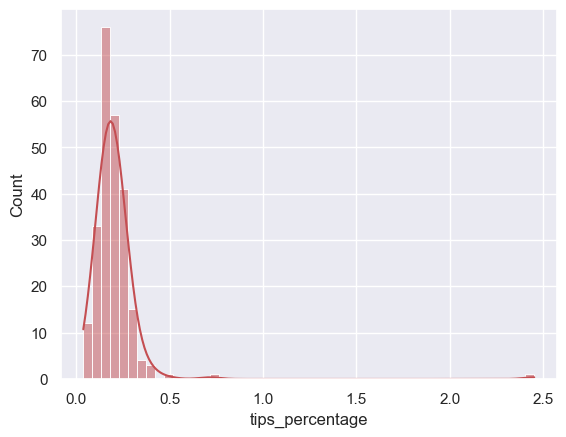

In [26]:
# Density plot (X, count)
sns.histplot(tips['tips_percentage'], kde=True, bins=50, color="r")

# Scatter plots + regression

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

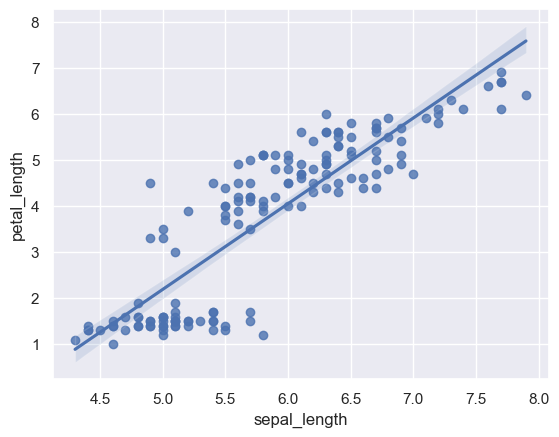

In [13]:
sns.regplot(x='sepal_length', y='petal_length', data=iris)

# Pair plots + regression

* Awesome for finding corrrelated variables
* Diagonal doesn't mean anything!
* Can also do 3-dimension plots!

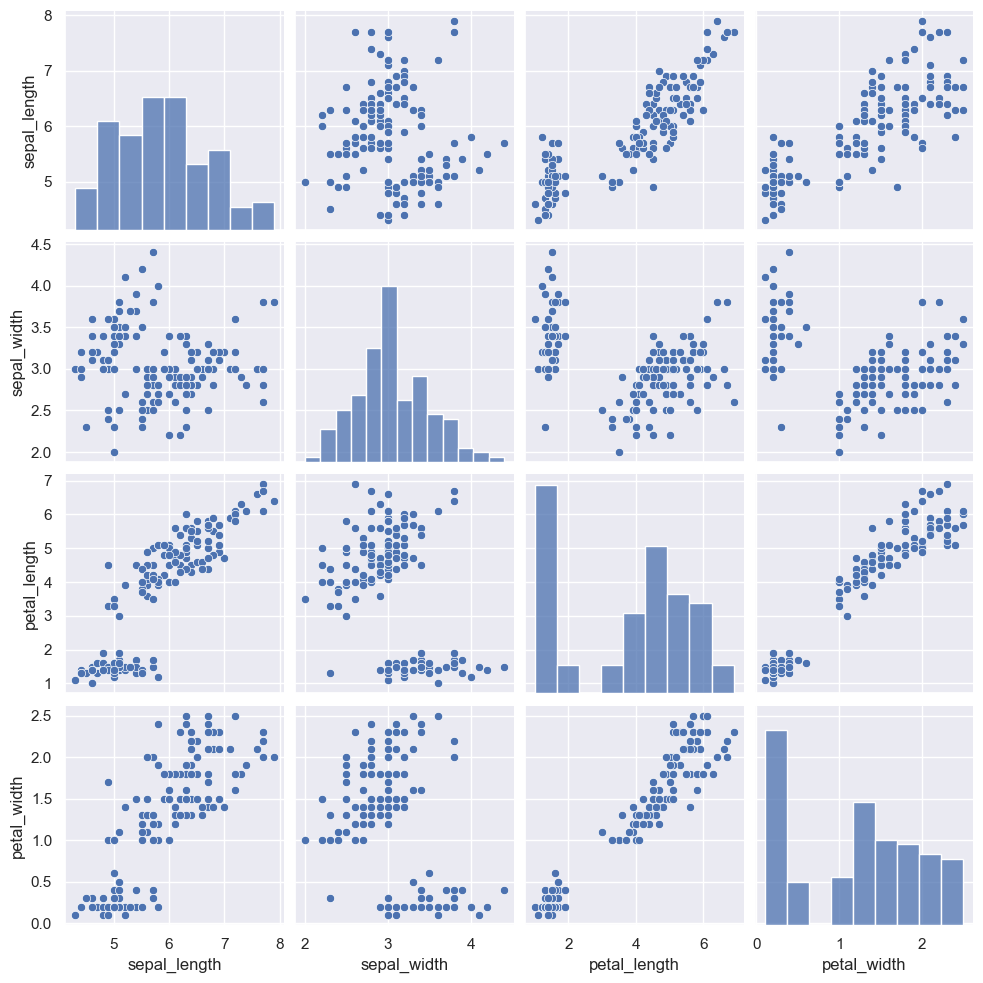

In [28]:
sns.pairplot(iris)

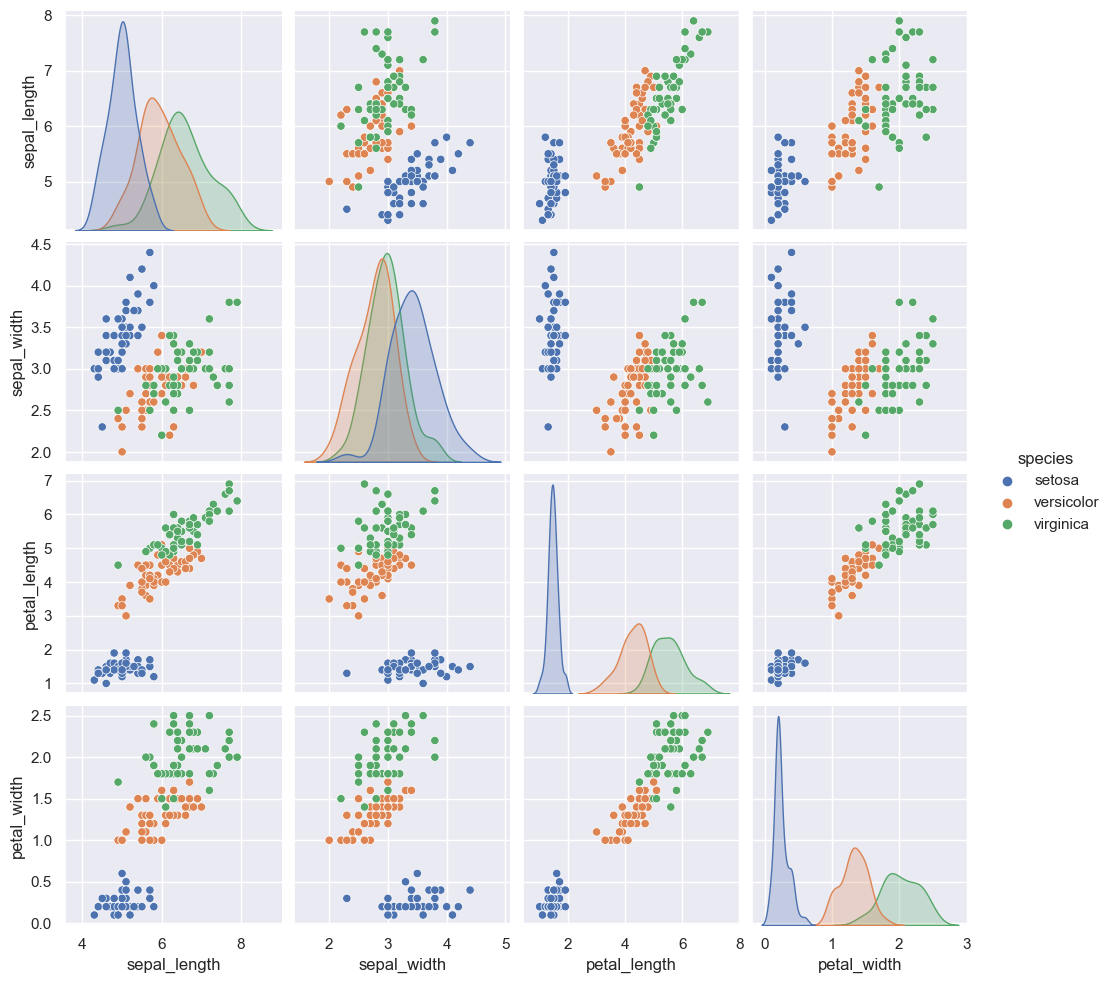

In [30]:
# 3-dmension plots
# Separated everything by species
sns.pairplot(iris,hue="species")

# Facet grids and categorical data

Facet grid are good when you deal with categorical data with only a few possible values

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


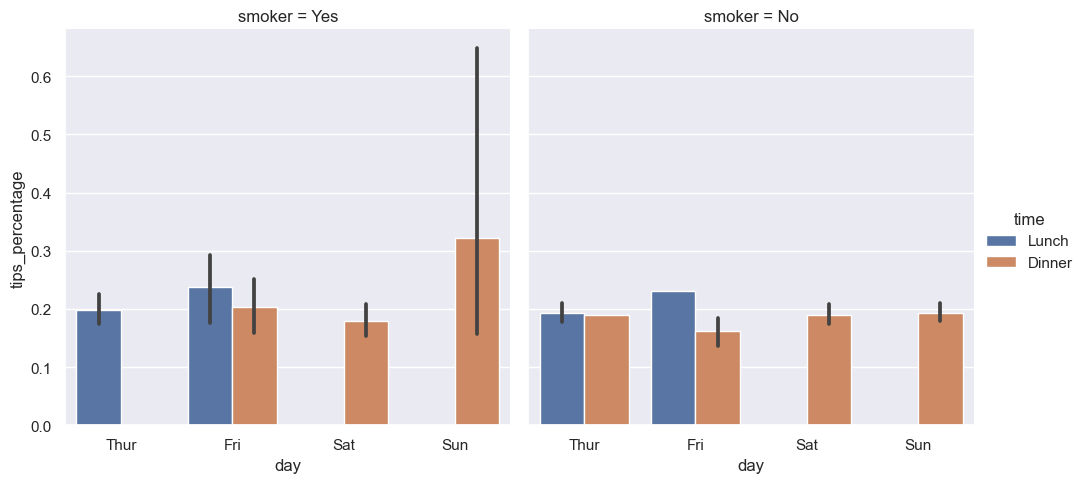

In [32]:
# 4-dimension plot = N * 3-dimension plots! (N=2 because only we only 2 categories for smokers [Yes, No])
sns.catplot(x='day',y='tips_percentage',hue='time',col='smoker',kind='bar',data=tips)

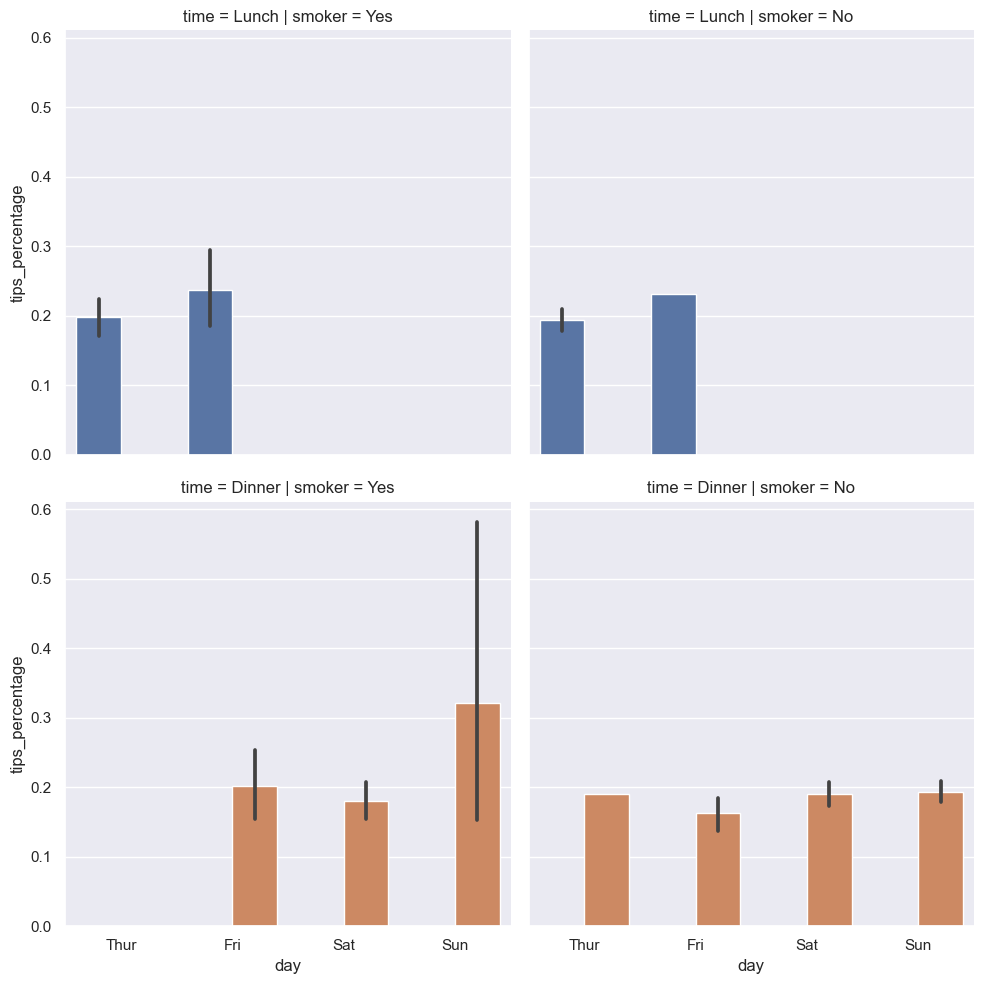

In [35]:
# 5-dimension plots = N * 4-dimension plots!
sns.catplot(x='day',y='tips_percentage',hue='time',col='smoker',kind='bar',data=tips, row='time')